In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import os

In [2]:
#Import true Data
stri="GA-03"
#C:\Users\ameya\OneDrive - University of Pittsburgh\Eclipse\TestingData\NewShiftedFiles
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/TestingData/NewShiftedFiles/"+stri +".txt"
#directory="C:/Users/asv26/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/"+stri
Data3=np.loadtxt(directory,delimiter=",")
Data3=Data3.T
Data3[0]=Data3[0]/2

#index=2
#newVData3=Data3[0][index:-1]
#newTData3=Data3[1][index:-1]-Data3[1][index]
#newData3=np.array([newVData3.T,newTData3.T])
newData3=Data3
print(newData3)

fsData3=1/np.mean(np.diff(newData3[1]))
print(fsData3)

[[1.11540958e+00 2.51155898e+00 2.51155898e+00 ... 1.82254880e+00
  1.82255149e+00 1.82253862e+00]
 [3.53716743e+01 3.53740313e+01 3.53763934e+01 ... 4.38264591e+03
  4.38264826e+03 4.38265063e+03]]
425.20712772478714


In [3]:
#Import true Data
stri="GA-04"
#C:\Users\ameya\OneDrive - University of Pittsburgh\Eclipse\TestingData\NewShiftedFiles
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/TestingData/NewShiftedFiles/"+stri +".txt"
#directory="C:/Users/asv26/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/"+stri
Data4=np.loadtxt(directory,delimiter=",")
Data4=Data4.T
Data4[0]=Data4[0]/2

#index=2
#newVData4=Data4[0][index:-1]
#newTData4=Data4[1][index:-1]-Data4[1][index]
#newData4=np.array([newVData4.T,newTData4.T])
newData4=Data4
print(newData4)

fsData4=1/np.mean(np.diff(newData4[1]))
print(fsData4)

[[-4.63575450e-01  1.36967276e+00  1.36929730e+00 ...  1.12841766e+00
   1.12838952e+00  1.12838503e+00]
 [ 4.79615923e+01  4.79639424e+01  4.79663295e+01 ...  4.38751032e+03
   4.38751267e+03  4.38751502e+03]]
425.11793691070045


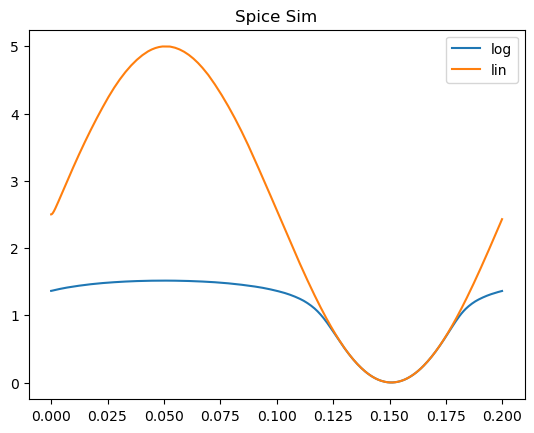

In [4]:
#import simulation results
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/TestingData/SimResults.txt"
simt,simlogv,simlinv,simi=np.loadtxt(directory,delimiter="\t",skiprows=1).T
plt.plot(simt,simlogv,label="log")
plt.plot(simt,simlinv,label="lin")
plt.legend()
plt.title("Spice Sim")
plt.show()
clippedlog=np.clip(simlogv,0,2.5)
clippedlin=np.clip(simlinv,0,2.5)


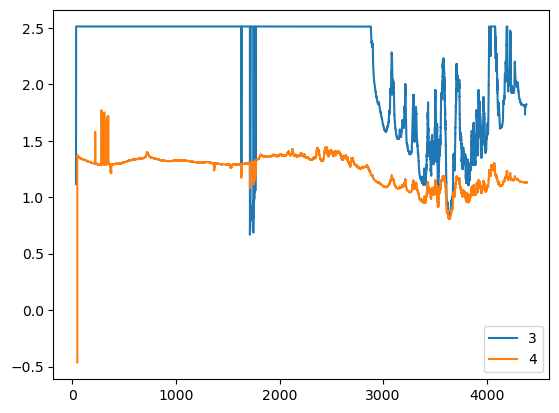

In [5]:
plt.plot(newData3[1],newData3[0],label="3")
plt.plot(newData4[1],newData4[0],label="4")
plt.legend()
plt.show()


In [6]:
def quickInterpolate(x,t,st):
    result=np.array([])
    for i in st:
        begin=np.where(t<i)[0][-1]
        last=np.where(t>i)[0][0]
        result=np.append(result,(x[last]+x[begin])/2)
    return np.array([result,st])

st=np.linspace(2800,4300,2000)
iGA3=quickInterpolate(newData3[0],newData3[1],st)
iGA4=quickInterpolate(newData4[0],newData4[1],st)


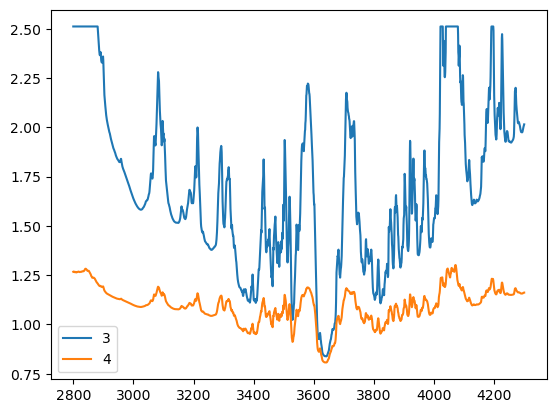

In [7]:
#plt.plot(iGA0[1],iGA0[0])
#plt.plot(iData[1],iData[0])
plt.plot(st,iGA3[0],label="3")
plt.plot(st,iGA4[0],label="4")
plt.legend()
#plt.ylim(1.05,1.1)

In [8]:
Vt=0.025
def transformLogToLin(x,a,b,c): #takes log to linear
    val=np.clip(b*np.exp(a*x)+c,0,2.5)
    return val
def linLogTransform(x,a,b,c,d,e): #linear below e, log above e. d slope of linear
    if(x<e):
        return d*x
    else:
        return np.clip(b*np.exp(a*x)+c,0,2.5)
def dankoModel(Vlog,Ismag,Rlog,Rlin,n):
    Is=Ismag
    i=(-Is*Rlog+np.exp(Vlog/(n*Vt))*Is*Rlog+Vlog)/Rlog #Current through photodiode in log circuit
    return np.clip(i*Rlin,0,2.5)

def dankoAdj(Vlog,Is,Rd,Rf,n,Rlin):
    c=1/(n*Vt)
    i=-Is+Vlog/Rf+np.real(scipy.special.lambertw(c*np.exp(c*(Is*Rd+Vlog))*Is*Rd))
    return np.clip(i*Rlin,0,2.5)

linLogTransform=np.vectorize(linLogTransform)



In [9]:
#Simple Log Transform

[5.65532901e+00 1.87370102e-03 6.90302958e-01]
[[ 5.68806425e-04 -1.34863191e-06  8.17707808e-05]
 [-1.34863191e-06  3.20177901e-09 -1.95954091e-07]
 [ 8.17707808e-05 -1.95954091e-07  1.29292069e-05]]
Error: 0.6929983234323129


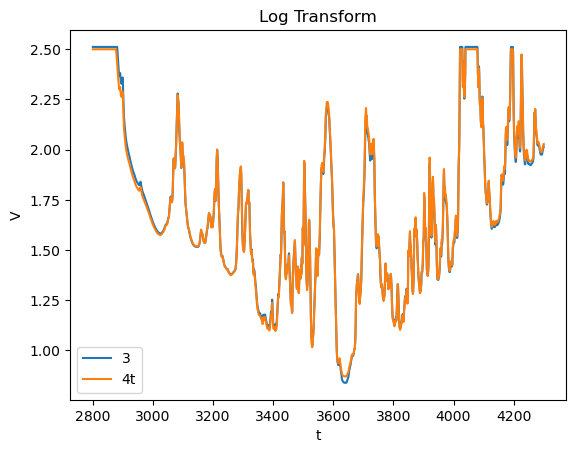

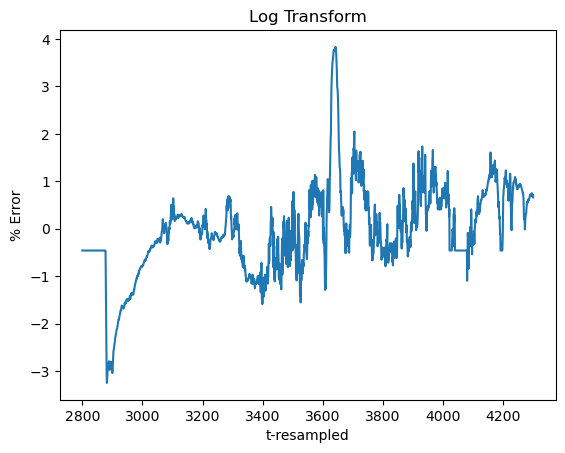

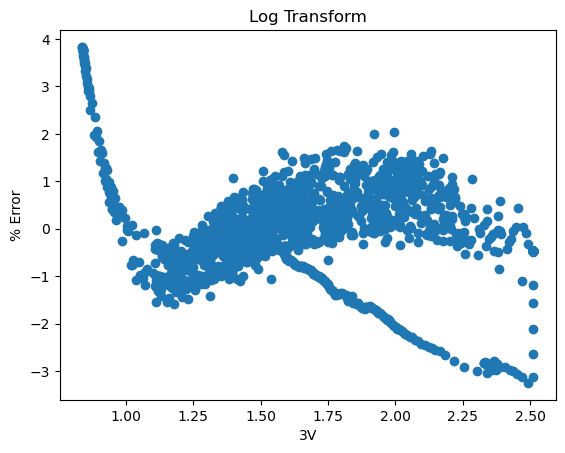

In [10]:
Lparams,stats=scipy.optimize.curve_fit(transformLogToLin,iGA4[0],iGA3[0],p0=[1,1,0])

print(Lparams)
print(stats)

transformediGA4=transformLogToLin(iGA4[0],*Lparams)
loglinoff=100*(transformediGA4-iGA3[0])/iGA3[0]
print("Error: "+ str(np.mean(np.abs(loglinoff))))


plt.plot(st,iGA3[0],label="3")
plt.plot(st,transformediGA4,label="4t")
plt.title("Log Transform")
plt.xlabel("t")
plt.ylabel("V")
plt.legend()
plt.show()
plt.plot(st,loglinoff)
plt.title("Log Transform")
plt.xlabel("t-resampled")
plt.ylabel("% Error")
plt.show()
plt.scatter(iGA3[0],loglinoff)
plt.title("Log Transform")
plt.xlabel("3V")
plt.ylabel("% Error")
plt.show()

In [11]:
#Lin Log Model

[6.06902125e+00 1.09975328e-03 7.57683950e-01 1.06561188e+00
 9.00000000e-01]
[[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
Error: 0.6151637913572505


C:\Users\ameya\anaconda3\envs\phys1321\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


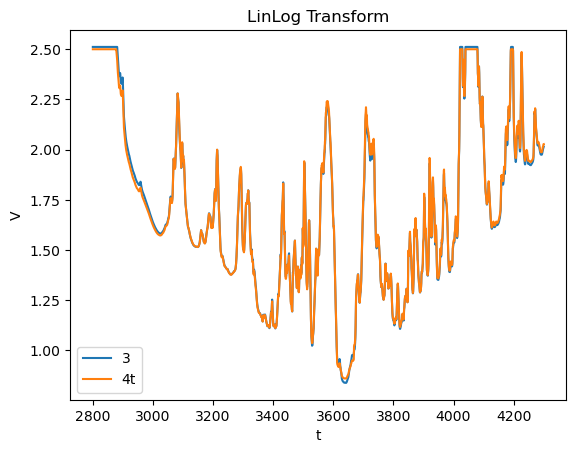

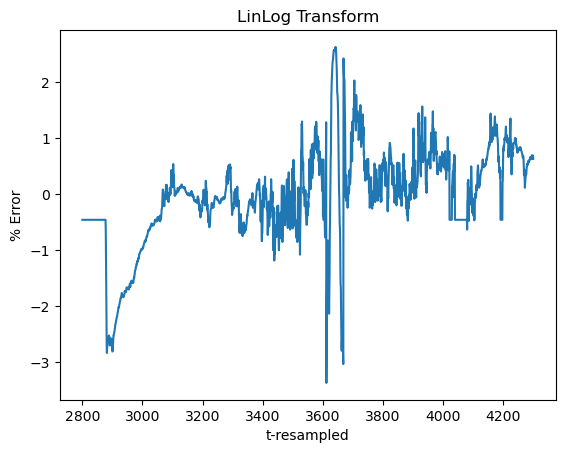

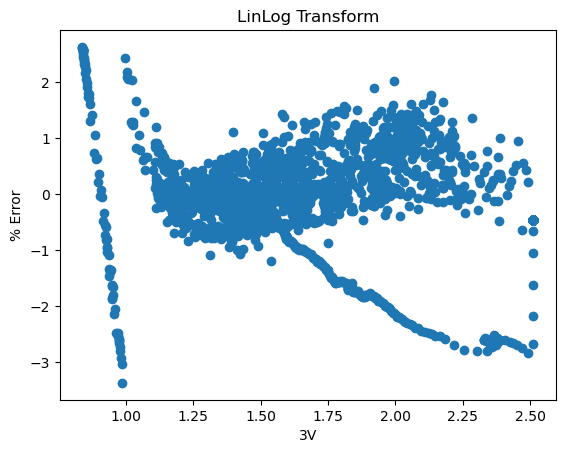

In [12]:
LiLoparams,stats=scipy.optimize.curve_fit(linLogTransform,iGA4[0],iGA3[0],p0=[5.6,2e-3,0.6,1.1,0.9])

print(LiLoparams)
print(stats)

transformediGA4=linLogTransform(iGA4[0],*LiLoparams)
loglinoff=100*(transformediGA4-iGA3[0])/iGA3[0]
print("Error: "+ str(np.mean(np.abs(loglinoff))))

plt.plot(st,iGA3[0],label="3")
plt.plot(st,transformediGA4,label="4t")
plt.title("LinLog Transform")
plt.xlabel("t")
plt.ylabel("V")
plt.legend()
plt.show()
plt.plot(st,loglinoff)
plt.title("LinLog Transform")
plt.xlabel("t-resampled")
plt.ylabel("% Error")
plt.show()
plt.scatter(iGA3[0],loglinoff)
plt.title("LinLog Transform")
plt.xlabel("3V")
plt.ylabel("% Error")
plt.show()

In [13]:
#Danko Model

[3.00957051e-09 4.90905680e+04 4.74822672e+04 5.31127458e+00]
[[ 8.80346065e-09 -1.43527480e+05 -1.38825244e+05  2.47721937e-08]
 [-1.43527480e+05  2.34000449e+18  2.26334146e+18 -4.03809575e+05]
 [-1.38825244e+05  2.26334146e+18  2.18919006e+18 -3.90583392e+05]
 [ 2.47730629e-08 -4.03823650e+05 -3.90597131e+05  7.00033615e-04]]
Error: 0.5524455062662234


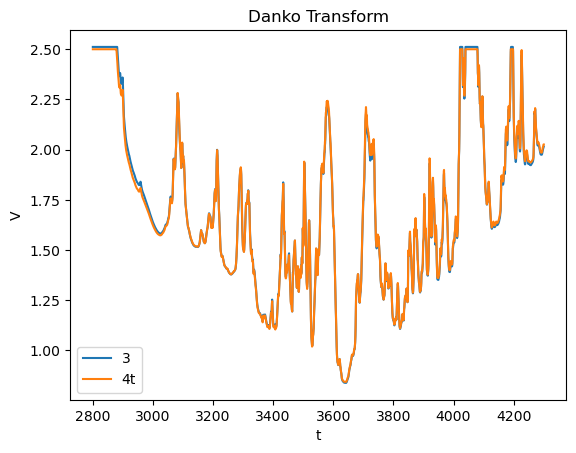

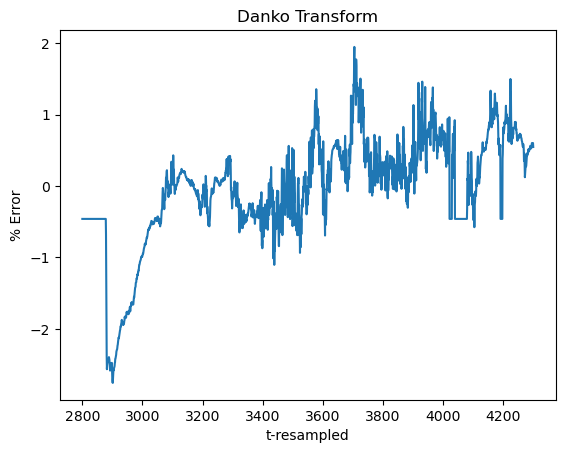

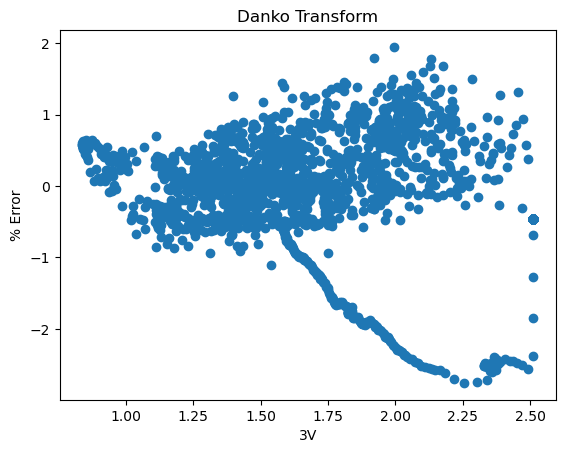

In [14]:
dparams,stats=scipy.optimize.curve_fit(dankoModel,iGA4[0],iGA3[0],p0=[4e-10,20e3,21e3,4])

print(dparams)
print(stats)

transformediGA4=dankoModel(iGA4[0],*dparams)
loglinoff=100*(transformediGA4-iGA3[0])/iGA3[0]
print("Error: "+ str(np.mean(np.abs(loglinoff))))

plt.plot(st,iGA3[0],label="3")
plt.plot(st,transformediGA4,label="4t")
plt.title("Danko Transform")
plt.xlabel("t")
plt.ylabel("V")
plt.legend()
plt.show()
plt.plot(st,loglinoff)
plt.title("Danko Transform")
plt.xlabel("t-resampled")
plt.ylabel("% Error")
plt.show()
plt.scatter(iGA3[0],loglinoff)
plt.title("Danko Transform")
plt.xlabel("3V")
plt.ylabel("% Error")
plt.show()

[1.56400299e-11 3.90985747e+01 3.20964853e+04 5.31139165e+00
 3.10392999e+04]
[[ 1.81389248e-13 -4.49012878e-01 -3.65756583e+00 -3.58626552e-08
  -3.53682737e+00]
 [-4.49064689e-01  1.11217751e+12  8.59776032e+12  8.60411595e+04
   8.31391333e+12]
 [-3.61510780e+00  8.49161451e+12  4.47608972e+14  2.96332862e+06
   4.32857486e+14]
 [-3.56078736e-08  8.54002266e+04  2.96658558e+06  2.12344473e-02
   2.86880064e+06]
 [-3.49576814e+00  8.21126463e+12  4.32857430e+14  2.86565065e+06
   4.18592099e+14]]
Error: 0.5524625406489843


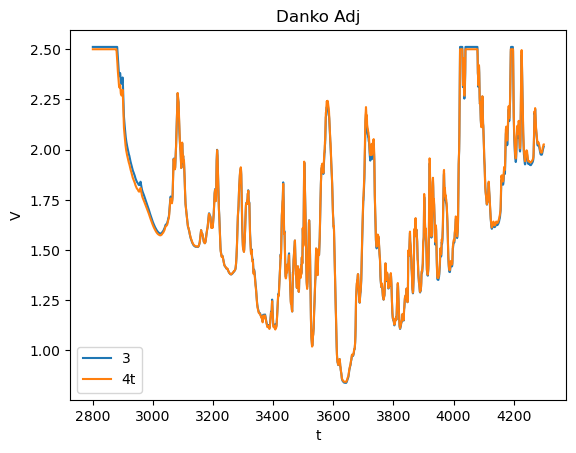

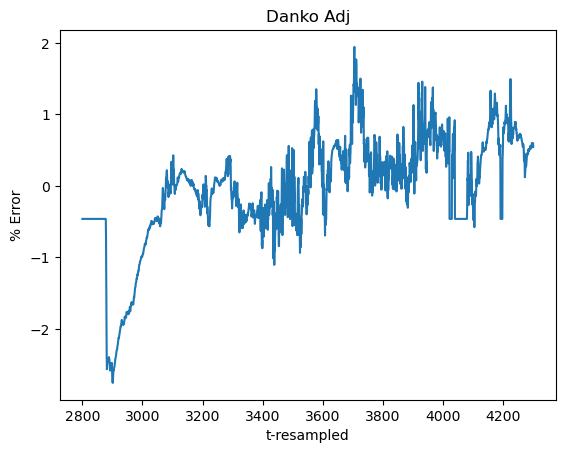

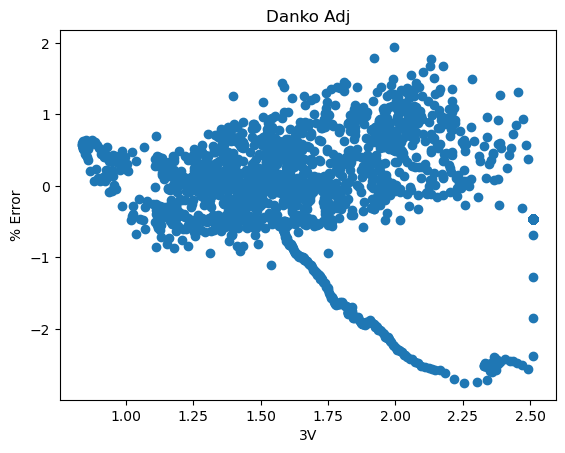

In [15]:
dadjparams,stats=scipy.optimize.curve_fit(dankoAdj,iGA4[0],iGA3[0],p0=[4e-12,10,21e3,4,21e3],maxfev=2400)
print(dadjparams)
print(stats)

transformediGA4=dankoAdj(iGA4[0],*dadjparams)
loglinoff=100*(transformediGA4-iGA3[0])/iGA3[0]
print("Error: "+ str(np.mean(np.abs(loglinoff))))

plt.plot(st,iGA3[0],label="3")
plt.plot(st,transformediGA4,label="4t")
plt.title("Danko Adj")
plt.xlabel("t")
plt.ylabel("V")
plt.legend()
plt.show()
plt.plot(st,loglinoff)
plt.title("Danko Adj")
plt.xlabel("t-resampled")
plt.ylabel("% Error")
plt.show()
plt.scatter(iGA3[0],loglinoff)
plt.title("Danko Adj")
plt.xlabel("3V")
plt.ylabel("% Error")
plt.show()

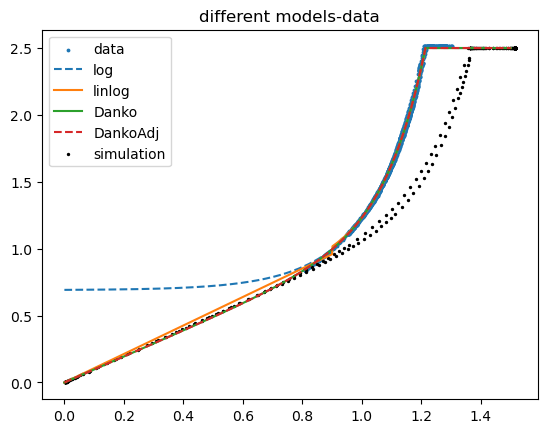

In [16]:
Vin=np.linspace(0,1.5,1000)
#plt.plot(Vin,linLogTransform(Vin,*[6.07134717e+00,1.09638691e-03,7.58102626e-01,1.06548718e+00, 9.00000000e-01]),label="linlog")
#plt.plot(Vin,transformLogToLin(Vin,*[5.65508249e+00,1.87411287e-03,6.90348485e-01]),label="log",linestyle="dashed")
#plt.plot(Vin,dankoModel(Vin,*[4e-10,20e03,21e+03,4]),label="Danko",linestyle="dashed")
#plt.plot(Vin,dankoAdj(Vin,*[1.56853937e-11, 3.92128269e+01, 3.22157081e+04, 5.31627354e+00, 3.11444451e+04]),label="DankoAdj",linestyle="dashed")
plt.scatter(iGA4[0],iGA3[0],label="data",s=3)
plt.plot(Vin,transformLogToLin(Vin,*Lparams),label="log",linestyle="dashed")
plt.plot(Vin,linLogTransform(Vin,*LiLoparams),label="linlog")
plt.plot(Vin,dankoModel(Vin,*dparams),label="Danko",linestyle="solid")
plt.plot(Vin,dankoAdj(Vin,*dadjparams),label="DankoAdj",linestyle="dashed")
plt.scatter(clippedlog,clippedlin,s=2,label="simulation",color="black")
plt.title("different models-data")
plt.legend()

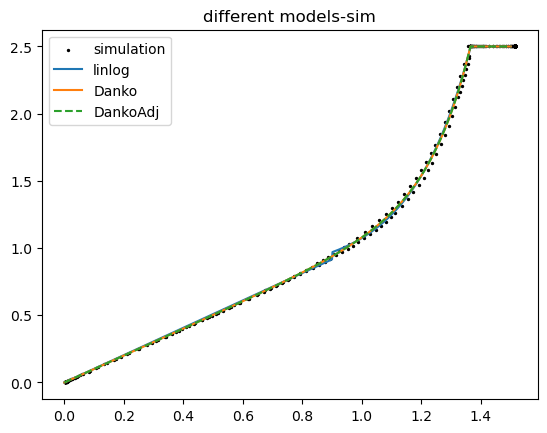

In [18]:
LiLoparamsSim,LiLostats=scipy.optimize.curve_fit(linLogTransform,clippedlog,clippedlin,p0=[5.6,2e-3,0.6,1.1,0.9])
dparamsSim,dstats=scipy.optimize.curve_fit(dankoModel,clippedlog,clippedlin,p0=[4e-10,20e3,21e3,4])
dadjparamsSim,dadjstats=scipy.optimize.curve_fit(dankoAdj,clippedlog,clippedlin,p0=[4e-12,10,21e3,4,21e3],maxfev=2400)

derr=np.sqrt(np.diag(dstats))
dadjerr=np.sqrt(np.diag(dadjstats))

plt.scatter(clippedlog,clippedlin,s=2,label="simulation",color="black")
plt.plot(Vin,linLogTransform(Vin,*LiLoparamsSim),label="linlog")
plt.plot(Vin,dankoModel(Vin,*dparamsSim),label="Danko",linestyle="solid")
plt.plot(Vin,dankoAdj(Vin,*dadjparamsSim),label="DankoAdj",linestyle="dashed")
plt.legend()
plt.title("different models-sim")
plt.plot()
plt.show()

In [19]:
#transformedGA4=transformLogToLin(newData4[0],*Lparams)
transformedGA4=linLogTransform(newData4[0],*LiLoparams)
#transformedGA4=dankoModel(newData4[0],*dparams)


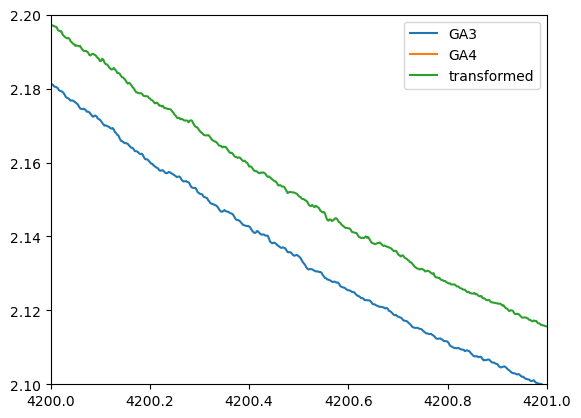

In [20]:
plt.plot(newData3[1],newData3[0],label="GA3")
plt.plot(newData4[1],newData4[0],label="GA4")
plt.plot(newData4[1],transformedGA4,label="transformed")
#plt.ylim(0.5,3)
#plt.xlim(2800,4500)
plt.xlim(4200,4201)
plt.ylim(2.1,2.2)
plt.legend()
plt.show()